In [1]:
#import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
#import datasets
from sklearn import datasets

In [2]:
#plot the Iris data
def plotData(data, names,labels,col1,col2, centroids = np.empty([0,0])):
    #plot the titles
    labelsType = "train"
    if (centroids.any()):
        labelsType = "test"
    plt.title("The Iris Dataset " + labelsType +  " labels")
    plt.xlabel(names[col1])
    plt.ylabel(names[col2])
    # plot the data with different color for every label and size of 50 pixels
    myplot =plt.scatter(data[:,col1],data[:,col2],c = labels, s=50)
    # plot the centroids if exists in blue and with X marker
    if (centroids.any()):
        plt.scatter(centroids[:,col1], centroids[:,col2], c='blue', marker = "x", s=80)
    plt.show(myplot)

In [3]:
def plotLabels(labels,labelsType):
    xmax=len(labels)
    plt.title("The Iris Dataset " + labelsType + " labels")
    plt.xlabel("Iris sample number")
    plt.ylabel("label")
    plt.bar(range(xmax),labels)
    plt.show()

In [4]:
def plotSilluette(silhouetteValues):
    plt.title("The silhouette test plot")
    plt.ylabel("The silhouette values")
    plt.xlabel("The sample#")
    plt.plot(silhouetteValues)
    plt.axis([0,len(silhouetteValues),-1,1])
    plt.hlines(np.average(silhouetteValues), 0, len(silhouetteValues), colors='black', linestyles="--")
    plt.hlines(0, 0, len(silhouetteValues), colors='red', linestyles="--")
    plt.show()

In [5]:
#from sklearn import datasets
Iris = datasets.load_iris()
data = Iris.data

In [6]:
from sklearn.model_selection import train_test_split
#split data to test and train
trueLabels = Iris.target+1 # true labeling
trainData, testData, trainLabels, testLabels = train_test_split(data, trueLabels, test_size = 0.25)

In [7]:
unique_values, counts = np.unique(testLabels, return_counts=True)
print(unique_values)
print(counts)

[1 2 3]
[11 12 15]


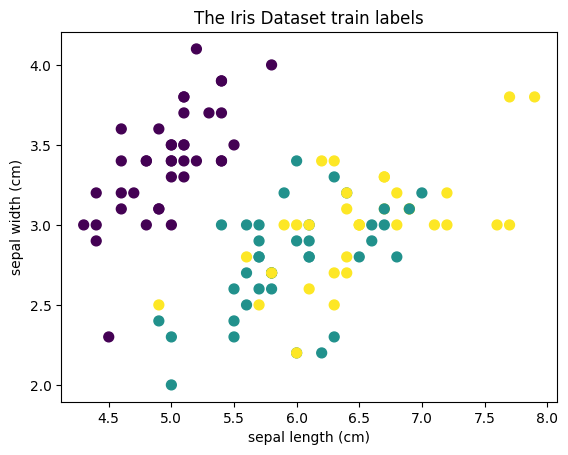

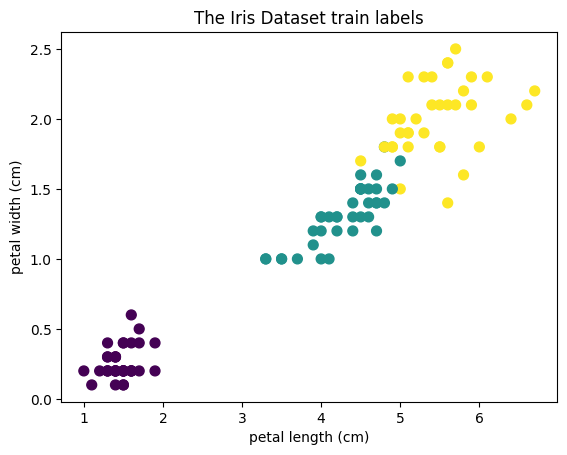

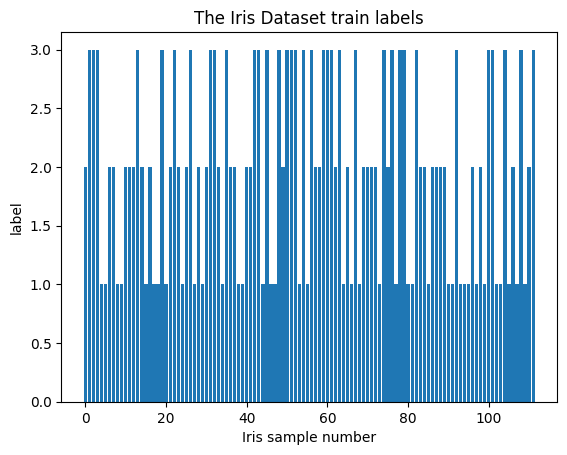

In [8]:
names = Iris.feature_names
plotData(trainData, names,trainLabels,0,1)
plotData(trainData, names,trainLabels,2,3)
plotLabels(trainLabels,"train")

In [9]:
k=3
kmeans = KMeans(n_clusters = k).fit(trainData)
Labels = kmeans.predict(testData)+1
centroids = kmeans.cluster_centers_

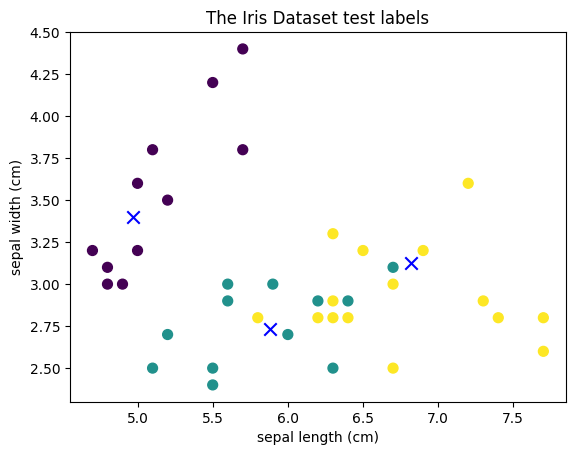

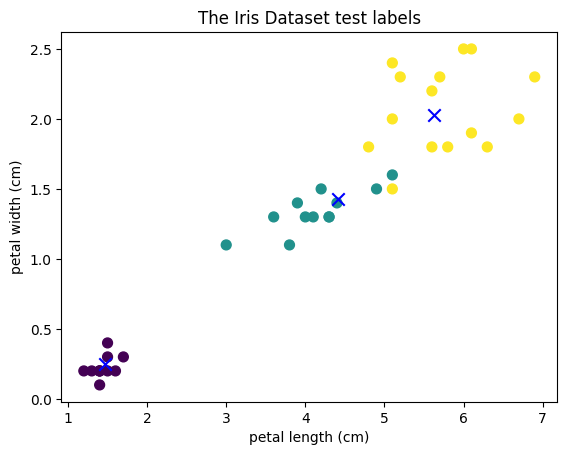

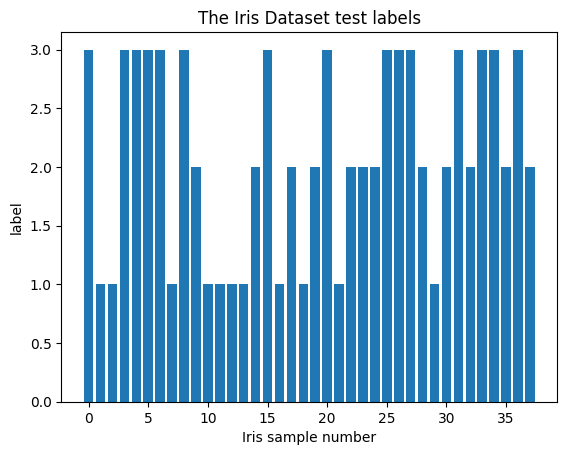

In [10]:
plotData(testData, names,testLabels,0,1,centroids)
plotData(testData, names,testLabels,2,3,centroids)
plotLabels(testLabels,"test")

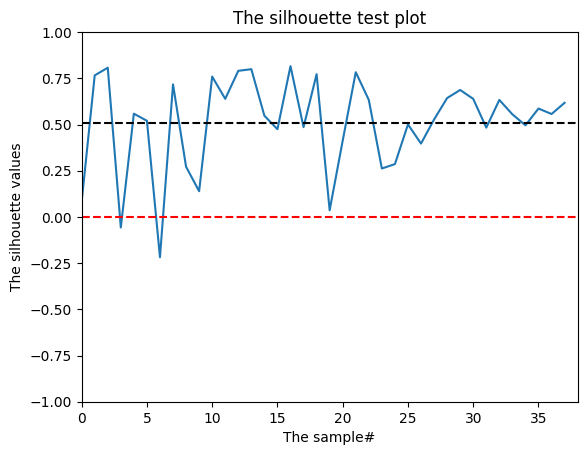

In [11]:
#plot the silhouette values
silhouetteValues = silhouette_samples(testData, testLabels)
plotSilluette(silhouetteValues)

In [12]:
print("For clusters =", k,
      "The average silhouette_score is: %.2f"  %np.average(silhouetteValues))

For clusters = 3 The average silhouette_score is: 0.51
